**Data Distribution**

The empirical rules use the mean and the standard deviation to estimate the ranges in which most of the observations will fall into. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.

*The standard deviation is largely depending on each member’s variance from the mean. The appearance of an extreme outlier will greatly increase the standard deviation compared to when without it. When talking about the distribution of data, we analyze the range in which the majority of data will fall into. The narrower the range, the better the conclusion. The three empirical rules provide these ranges based on the value of the standard deviation. Without the extreme outliers, we might come up with a much better conclusion about the distribution of data based on smaller ranges.*


In [1]:
# Read data from file
import pandas as pd
df=pd.read_csv('baseball.csv')
df.tail()

,Team,League,Year,RunsScored,RunsAllowed,Wins,OnBasePercentage,SluggingPercentage,BattingAverage,Playoffs,RankSeason,RankPlayoffs,GamesPlayed,OpponentOnBasePercentage,OpponentSluggingPercentage
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [2]:
mean=df.RunsScored.mean()
print('The mean of runs-scored per team/season: \n', round(mean))

The mean of runs-scored per team/season: 
 715


In [3]:
import numpy as np
std=np.std(df['RunsScored'])
print('Standard deviation of runs-scored for each team/season:',round(std))
print("About 95% of all runs-scored is within", round(mean-2*std),"and ",round(mean+2*std),', assuming the distribution of runs-scored is like Normal Distribution')

Standard deviation of runs-scored for each team/season: 91
About 95% of all runs-scored is within 532 and  898 , assuming the distribution of runs-scored is like Normal Distribution


**Measures of shape:**
Kurtosis and Skewness

In [4]:
import scipy.stats as stats
kurtosis=stats.kurtosis(df.RunsScored)
print('Kurtosis is :', kurtosis)

if kurtosis < 0: print('Kurtosis < 0 means the tails is shorter than in normal distribution, indicates less outliners')
elif kurtosis > 0: print('Kurtosis > 0 means the tails is longer than in normal distribution, indicates more outliners')
else: print('Like normal distribution')

Kurtosis is : -0.025359287631994576
Kurtosis < 0 means the tails is shorter than in normal distribution, indicates less outliners


In [5]:
skew=stats.skew(df['RunsScored'])
print('Skewness is :',skew)
if skew>0: print('Skewness > 0 means data is skewed to the right, the mean is larger than the median, some very large values were not balanced by the presence of very small values')
elif skew<0: print('Skewness < 0 means data is skewed to the left, the mean is smaller than the median, some very small values were not balanced by the presence of very large values')
else: print('Data is not skewed, mean and median about the same')

Skewness is : 0.17429532064927028
Skewness > 0 means data is skewed to the right, the mean is larger than the median, some very large values were not balanced by the presence of very small values


<IPython.core.display.Javascript object>


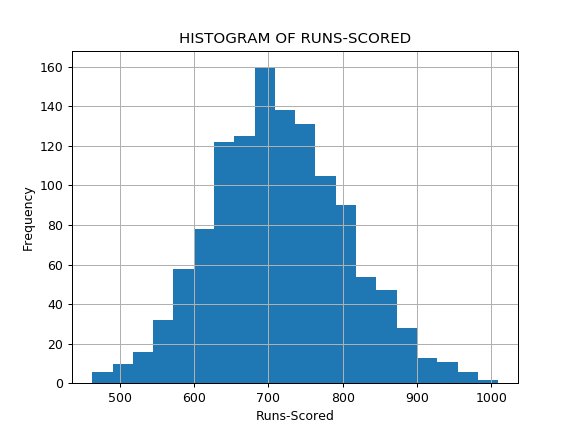

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df.RunsScored, bins=20)
plt.title('HISTOGRAM OF RUNS-SCORED')
plt.xlabel('Runs-Scored')
plt.ylabel('Frequency')
plt.grid()

<IPython.core.display.Javascript object>


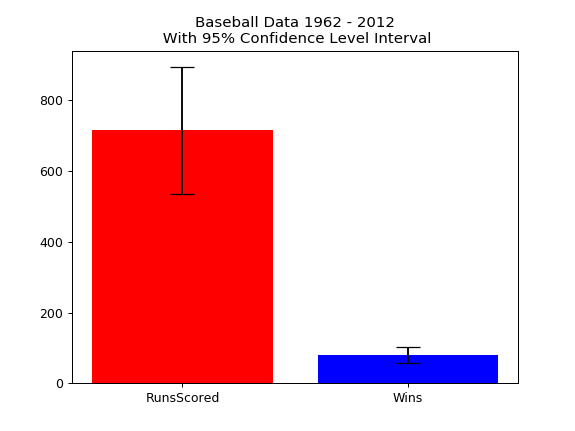

<BarContainer object of 2 artists>

In [7]:
%matplotlib notebook
from matplotlib import cm

df1 = df[['RunsScored','Wins']]
yerrs = []
for i in range (len(df1.columns)) : yerrs.append(1.96*df1.std().iloc[i])
colors = ['Red','Blue']

plt.figure()
plt.title('Baseball Data 1962 - 2012\n With 95% Confidence Level Interval')
plt.bar(range(len(df1.columns)), df1.mean(), yerr=yerrs, error_kw={'capsize': 10}, color = colors, tick_label=df1.columns)